In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

In [7]:
data=pd.read_csv("housing2.csv")

In [8]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


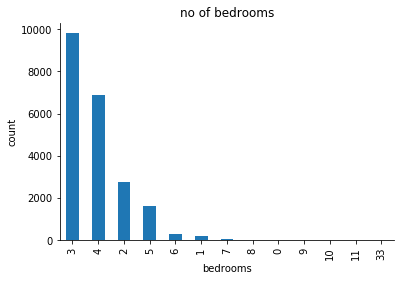

In [12]:
data['bedrooms'].value_counts().plot(kind='bar')
plt.title('no of bedrooms')
plt.xlabel('bedrooms')
plt.ylabel('count')
sns.despine()

<Figure size 720x720 with 0 Axes>

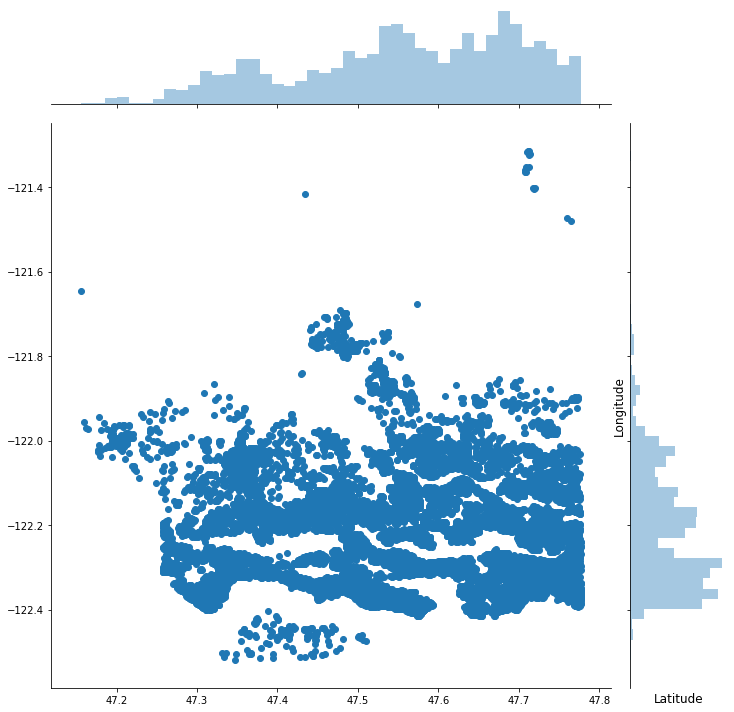

<Figure size 432x288 with 0 Axes>

In [15]:
plt.figure(figsize=(10,10))
sns.jointplot(x=data.lat.values,y=data.long.values,height=10)
plt.ylabel('Longitude',fontsize=12)
plt.xlabel('Latitude',fontsize=12)
plt.show()
sns.despine()

Text(0.5, 1.0, 'Price vs Squre Feet')

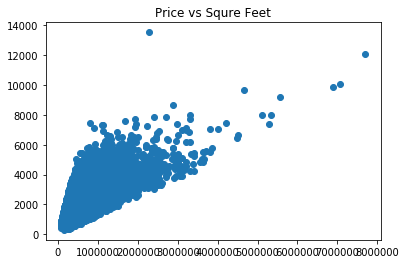

In [16]:
plt.scatter(data.price,data.sqft_living)
plt.title('Price vs Squre Feet')

Text(0.5, 1.0, 'Price vs Location of Area')

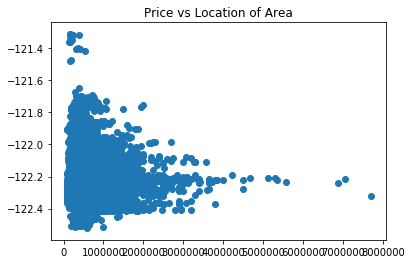

In [17]:
plt.scatter(data.price,data.long)
plt.title("Price vs Location of Area")

In [18]:
from sklearn.linear_model import LinearRegression 

In [19]:
reg=LinearRegression()

In [23]:
labels=data['price']
conv_dates=[1 if values==2014 else 0 for values in data.date]
data['date']=conv_dates
train1=data.drop(['id','price'],axis=1)


In [2]:
#from sklearn.cross_validation import train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test=train_test_split(train1,labels,test_size=0.10,random_state=2)

In [33]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
reg.score(x_test,y_test)

0.7320342760357544

In [37]:
from sklearn import ensemble
clf=ensemble.GradientBoostingRegressor(n_estimators=400,max_depth=5,min_samples_split=2,learning_rate=0.1,loss='ls')

In [39]:
clf.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [40]:
clf.score(x_test,y_test)

0.9205492489314857